### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture


## Create N doors

In [54]:
#goats = 0
#car = 1

def create_doors(N):
    d=np.zeros(N)
    d[np.random.randint(0, N)] = 1
    
    return d

### Game with Three doors

In [50]:
def switch_game(doors, choice):

    if doors[choice]==0:
        return 1
    else: return 0

def cons_game(doors, choice):
    
    if doors[choice]==0:
        return 0
    else: return 1

def new_game(doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]])
    available_indices = [i for i in range(N) if i != doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

In [51]:
N = 3
games = 1000
game_s = np.empty(games)
game_c = np.empty(games)
game_n = np.empty(games)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    #print('doors', doors)
    #print('choice', choice)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game(doors, choice)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times')


switcher wins 682 times and loose 318 times
conservative wins 318 times and loose 682 times
newcomer wins 505 times and loose 495 times


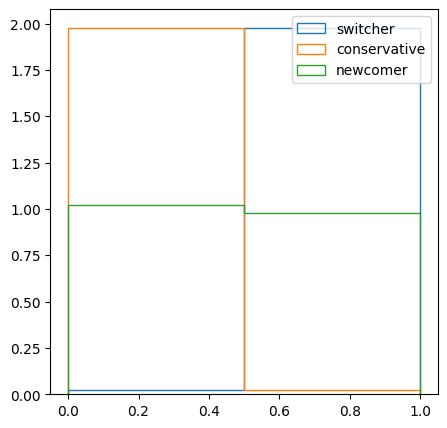

In [67]:
fig,ax = plt.subplots(figsize=(5, 5))
plt.hist(game_s, 2, histtype='step', label='switcher',  density=True)
plt.hist(game_c, 2, histtype='step', label='conservative',  density=True)
plt.hist(game_n, 2, histtype='step', label='newcomer',  density=True)

ax.legend(loc='upper right')
fig.show()

### 100 doors and the presenter open 98

In [63]:
def new_game_98 (doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], 98, replace=False) 
    #print(doors_open)
    available_indices = [i for i in range(N) if i not in doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

In [64]:
N = 100
games = 1000
game_s = np.empty(1000)
game_c = np.empty(1000)
game_n = np.empty(1000)

for i in range(games):
    doors = create_doors(N)
    choice = np.random.randint(0, N)
    game_s[i] = switch_game(doors, choice)
    game_c[i] = cons_game(doors, choice)
    game_n[i] = new_game_98(doors, choice)

s_loose=len(np.where(game_s==0)[0])
s_win=games-s_loose
print('switcher wins', s_win, 'times and loose', s_loose, 'times')

c_loose=len(np.where(game_c==0)[0])
c_win=games-c_loose
print('conservative wins', c_win, 'times and loose', c_loose, 'times')

n_loose=len(np.where(game_n==0)[0])
n_win=games-n_loose
print('newcomer wins', n_win, 'times and loose', n_loose, 'times')

switcher wins 989 times and loose 11 times
conservative wins 11 times and loose 989 times
newcomer wins 490 times and loose 510 times


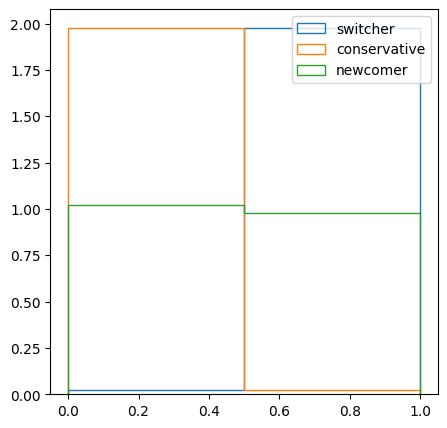

In [66]:
fig,ax = plt.subplots(figsize=(5, 5))
plt.hist(game_s, 2, histtype='step', label='switcher', density=True)
plt.hist(game_c, 2, histtype='step', label='conservative',  density=True)
plt.hist(game_n, 2, histtype='step', label='newcomer',  density=True)

ax.legend(loc='upper right')
fig.show()

### N doors and the presenter open M<N-2 (4/09) (magari questo rivedi la visualizzazione)

In [78]:
def new_switch_game(doors, choice, M):

    if doors[choice]==1:
        return 0
    else:
        doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], M, replace=False) 
        #print(doors_open)
        available_indices = [i for i in range(N) if i not in doors_open and i != choice]
        new_choice = np.random.choice(available_indices, 1)
        
        if doors[new_choice] == 1:
            return 1
        else:
            return 0

def new_new_game (doors, choice):
    
    doors_open = np.random.choice([i for i in range(N) if i != choice and i != np.where(doors == 1)[0][0]], M, replace=False) 
    #print(doors_open)
    available_indices = [i for i in range(N) if i not in doors_open]
    new_choice = np.random.choice(available_indices, 1)
   
    if doors[new_choice]==0:
        return 0
    else: return 1

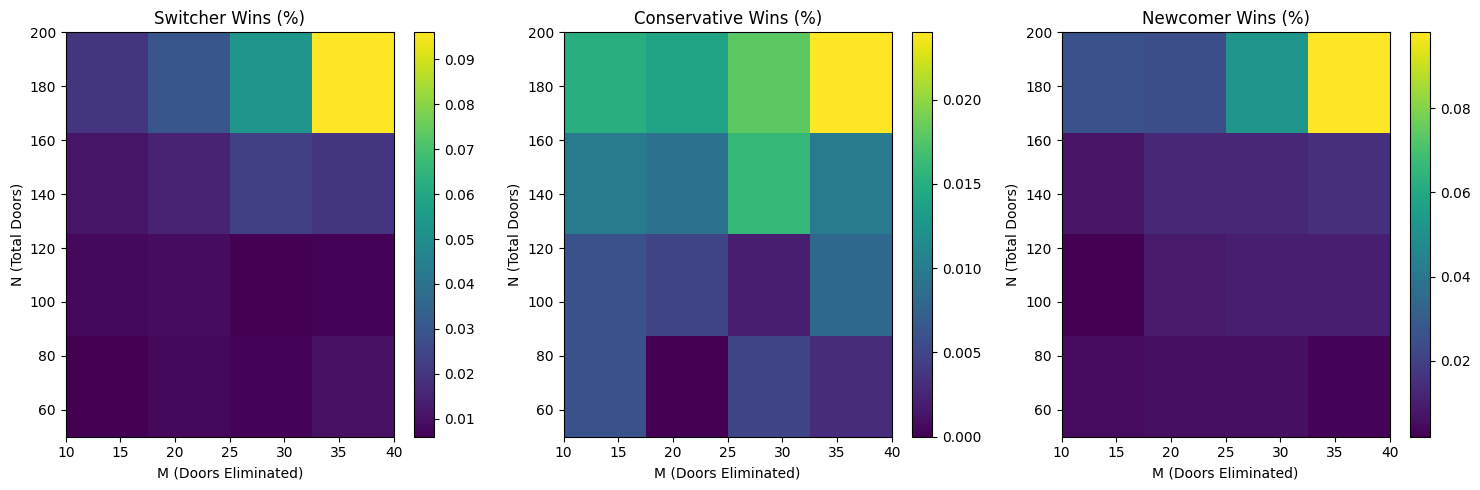

In [81]:
# Parametri
games = 1000  # Numero di partite
N_values = [50, 100, 150, 200]  # Valori di N da provare
M_values = [10, 20, 30, 40]  # Valori di M da provare

# Per registrare le vittorie
results_switch = np.zeros((len(N_values), len(M_values)))
results_conservative = np.zeros((len(N_values), len(M_values)))
results_newcomer = np.zeros((len(N_values), len(M_values)))

# Loop su N e M
for ni, N in enumerate(N_values):
    for mi, M in enumerate(M_values):
        game_s = np.empty(games)
        game_c = np.empty(games)
        game_n = np.empty(games)
        
        for i in range(games):
            doors = create_doors(N)
            choice = np.random.randint(0, N)
            game_s[i] = new_switch_game(doors, choice, M)
            game_c[i] = cons_game(doors, choice)
            game_n[i] = new_new_game(doors, N)
        
        # Calcolare vittorie e sconfitte
        s_win = np.sum(game_s)
        c_win = np.sum(game_c)
        n_win = np.sum(game_n)
        
        # Salvare risultati
        results_switch[ni, mi] = s_win / games
        results_conservative[ni, mi] = c_win / games
        results_newcomer[ni, mi] = n_win / games

# Grafico
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Andamento vittorie per switcher
c = ax[0].imshow(results_switch, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[0].set_title('Switcher Wins (%)')
ax[0].set_xlabel('M (Doors Eliminated)')
ax[0].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[0])

# Andamento vittorie per conservatore
c = ax[1].imshow(results_conservative, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[1].set_title('Conservative Wins (%)')
ax[1].set_xlabel('M (Doors Eliminated)')
ax[1].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[1])

# Andamento vittorie per newcomer
c = ax[2].imshow(results_newcomer, cmap='viridis', aspect='auto', extent=[min(M_values), max(M_values), min(N_values), max(N_values)])
ax[2].set_title('Newcomer Wins (%)')
ax[2].set_xlabel('M (Doors Eliminated)')
ax[2].set_ylabel('N (Total Doors)')
fig.colorbar(c, ax=ax[2])

plt.tight_layout()
plt.show()